In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

import folium
from folium.plugins import HeatMap

In [4]:
# movie_file = "Resources/movie_scores.csv"
cali_fire = "Resources/California_Fire_Incidents.csv"

cali_fire_df = pd.read_csv(cali_fire)
cali_fire_df.head(10)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Started,Time.1,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,8/17/13,15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,5/30/13,15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,7/15/13,13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,8/10/13,16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,5/2/13,07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
5,22992.0,False,Sierra National Forest,NaN,2013,False,/incidents/2013/7/22/aspen-fire/,NaN,NaN,Fresno,...,7/22/13,22:15:00Z,Finalized,NaN,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,NaN
6,20292.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/8/7/silver-fire/,Firefighters closed the containment lines toda...,Hwy 243 remains closed between Twin Pines Road...,Riverside,...,8/7/13,14:05:00Z,Finalized,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,2013-08-12T18:00:00Z,20.0
7,14754.0,False,Klamath National Forest,NaN,2013,False,/incidents/2013/7/31/salmon-river-complex/,NaN,NaN,Siskiyou,...,7/31/13,22:00:00Z,Finalized,NaN,NaN,NaN,NaN,ba76c009-09c9-497c-b923-1ac8cf05c20d,2013-08-31T06:45:00Z,NaN
8,12503.0,False,Six Rivers National Forest,NaN,2013,False,/incidents/2013/8/10/corral-complex/,NaN,NaN,Humboldt,...,8/10/13,11:40:00Z,Finalized,NaN,NaN,NaN,NaN,f3dcbca8-f8ed-46d0-8f6e-9c7fc2fb03e6,2013-08-12T12:00:00Z,NaN
9,11429.0,False,CAL FIRE Tehama-Glenn Unit,NaN,2013,True,/incidents/2013/8/23/deer-fire/,Fire suppression repair will continue througho...,NaN,Tehama,...,8/23/13,14:15:00Z,Finalized,NaN,NaN,NaN,NaN,956dbcf6-db40-4b61-b235-4ede14738f1e,2013-08-29T16:45:00Z,8.0


In [5]:
#columns = "Active", "CanonicalUrl", "ConditionStatement", "ControlStatement", "Time.1", "Status"
pyre_df = cali_fire_df.drop(columns=["Active", "StructuresEvacuated", "ConditionStatement", "FuelType", "Location", "ControlStatement", "CalFireIncident", "AdminUnit", "PercentContained", "Time.1", "Time", "Status", "SearchDescription", "SearchKeywords", "Public", "Updated"])
pyre_df.head()

# "CanonicalUrl",

,AcresBurned,AirTankers,ArchiveYear,CanonicalUrl,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,...,Longitude,MajorIncident,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresThreatened,UniqueId,WaterTenders
0,257314.0,NaN,2013,/incidents/2013/8/17/rim-fire/,Tuolumne,55,NaN,NaN,NaN,9/6/13,...,-120.086000,False,Rim Fire,NaN,8/17/13,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,NaN
1,30274.0,NaN,2013,/incidents/2013/5/30/powerhouse-fire/,Los Angeles,19,NaN,NaN,NaN,6/8/13,...,-118.423176,False,Powerhouse Fire,NaN,5/30/13,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,NaN
2,27531.0,NaN,2013,/incidents/2013/7/15/mountain-fire/,Riverside,33,NaN,NaN,NaN,7/30/13,...,-116.728850,False,Mountain Fire,NaN,7/15/13,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,NaN
3,27440.0,NaN,2013,/incidents/2013/8/10/american-fire/,Placer,31,NaN,NaN,NaN,8/30/13,...,-120.650000,False,American Fire,NaN,8/10/13,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,NaN
4,24251.0,NaN,2013,/incidents/2013/5/2/springs-fire/,Ventura,56,47.0,8.0,117.0,5/11/13,...,0.000000,True,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0


In [7]:
# Percentage of each resource involved (pie chart for all resources data)

In [16]:
# pyre_df = pyre_df.groupby(by="MajorIncident")                                  
# pyre_df.head()

major_df = pyre_df.loc[pyre_df["MajorIncident"]==True]
major2_df = pyre_df.loc[pyre_df['AcresBurned']>=10]
major_df.head(10)
major_df = major_df.drop_duplicates("UniqueId")
major_df.head(10)
# major2_df = unique_id2_df.loc[unique_id2_df['AcresBurned']>=10]
# major2_df.head()
#major["MajorIncident"].count()

,AcresBurned,AirTankers,ArchiveYear,CanonicalUrl,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,...,Longitude,MajorIncident,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresThreatened,UniqueId,WaterTenders
4,24251.0,NaN,2013,/incidents/2013/5/2/springs-fire/,Ventura,56,47.0,8.0,117.0,5/11/13,...,0.000000,True,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0
6,20292.0,NaN,2013,/incidents/2013/8/7/silver-fire/,Riverside,33,63.0,20.0,201.0,8/12/13,...,-116.904270,True,Silver Fire,2106.0,8/7/13,8.0,40.0,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,20.0
9,11429.0,NaN,2013,/incidents/2013/8/23/deer-fire/,Tehama,52,30.0,3.0,36.0,8/29/13,...,-121.853970,True,Deer Fire,898.0,8/23/13,NaN,NaN,NaN,956dbcf6-db40-4b61-b235-4ede14738f1e,8.0
10,8073.0,NaN,2013,/incidents/2013/9/9/clover-fire/,Shasta,45,12.0,3.0,30.0,9/15/13,...,-122.535496,True,Clover Fire,342.0,9/9/13,10.0,201.0,NaN,92af9783-eda9-4186-afe9-447f61a92636,NaN
11,7055.0,NaN,2013,/incidents/2013/7/6/chariot-fire/,San Diego,37,56.0,24.0,183.0,7/15/13,...,-116.473810,True,Chariot Fire,2147.0,7/6/13,9.0,149.0,NaN,ee19b2ec-a96a-4738-994e-fb3ea016e053,24.0
12,6965.0,NaN,2013,/incidents/2013/5/1/panther-fire/,Tehama,52,53.0,22.0,131.0,5/9/13,...,-121.595555,True,Panther Fire,1811.0,5/1/13,NaN,NaN,NaN,53122f0f-fefc-4dbf-b2d8-566b42ced66d,40.0
13,4346.0,NaN,2013,/incidents/2013/5/15/grand-fire/,Kern,15;56,29.0,1.0,34.0,5/21/13,...,-118.941100,True,Grand Fire,847.0,5/15/13,NaN,NaN,NaN,e0d038e9-0926-4c05-8317-ec7075a04b12,12.0
15,3505.0,NaN,2013,/incidents/2013/11/22/mccabe-fire/,Sonoma,49,8.0,NaN,5.0,11/27/13,...,-122.849800,True,McCabe Fire,188.0,11/22/13,NaN,1.0,NaN,b4bc1480-cbb8-4ef2-8d5f-88a496d21d10,NaN
16,3166.0,NaN,2013,/incidents/2013/5/1/summit-fire/,Riverside,33,36.0,5.0,62.0,5/4/13,...,-116.941311,True,Summit Fire,726.0,5/1/13,NaN,1.0,NaN,a1b14be5-a8cf-4e40-8588-96becf4c5879,7.0
17,3111.0,NaN,2013,/incidents/2013/9/8/morgan-fire/,Contra Costa,7,8.0,5.0,3.0,9/14/13,...,-121.882582,True,Morgan Fire,231.0,9/8/13,NaN,NaN,NaN,e33b2d80-7fec-4470-9e79-440d349b0d95,4.0


In [17]:
major_df.count()

AcresBurned             361
AirTankers               26
ArchiveYear             361
CanonicalUrl            361
Counties                361
CountyIds               361
CrewsInvolved           161
Dozers                  114
Engines                 179
Extinguished            356
Days Burned             361
Fatalities               13
Featured                361
Final                   361
Helicopters              80
Injuries                108
Latitude                361
Longitude               361
MajorIncident           361
Name                    361
PersonnelInvolved       184
Started                 361
StructuresDamaged        59
StructuresDestroyed     144
StructuresThreatened     23
UniqueId                361
WaterTenders            136
dtype: int64

<function matplotlib.pyplot.close(fig=None)>

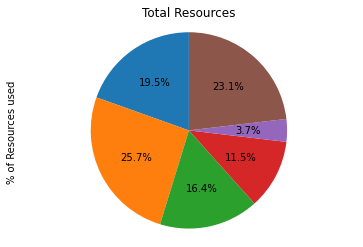

In [42]:

wt_usage_df = major_df['WaterTenders'].count()/major_df.count()
wt_usage_df


wt_usage = major_df['WaterTenders'].count()/major_df["MajorIncident"].count()
wt_usage
engines_usage = major_df['Engines'].count()/major_df["MajorIncident"].count()
engines_usage
dozers_usage = major_df['Dozers'].count()/major_df["MajorIncident"].count()
dozers_usage
helicopters_usage = major_df['Helicopters'].count()/major_df["MajorIncident"].count()
helicopters_usage
air_tankers_usage = major_df['AirTankers'].count()/major_df["MajorIncident"].count()
air_tankers_usage
crews_usage = major_df['CrewsInvolved'].count()/major_df["MajorIncident"].count()
crews_usage

index = ['wt_usage', 'engines_usage', 'dozers_usage', 'helicopters_usage', 'air_tankers_usage', 'crews_usage']

plt.pie((wt_usage, engines_usage, dozers_usage, helicopters_usage, air_tankers_usage, crews_usage), autopct="%1.1f%%", startangle=90)
plt.title("Total Resources")
plt.ylabel('% of Resources used')
plt.axis("equal")
plt.savefig('piechart.png')
plt.show
plt.close
# labels=labels
# wt_pie_df = wt_usage_df.plot.pie(figsize=(5,5), autopct="%1.1f%%")

<function matplotlib.pyplot.show(*args, **kw)>

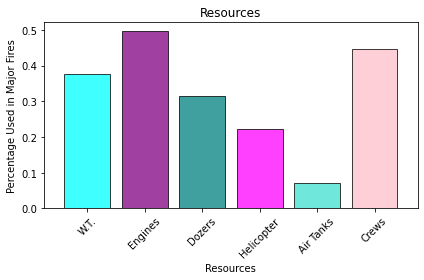

In [44]:
#plt.bar((wt_usage, engines_usage, dozers_usage, helicopters_usage, air_tankers_usage)

x_axis = np.arange(0, len((wt_usage, engines_usage, dozers_usage, helicopters_usage, air_tankers_usage, crews_usage)),1)
y_axis = (wt_usage, engines_usage, dozers_usage, helicopters_usage, air_tankers_usage, crews_usage)

plt.title("Resources")
plt.xlabel("Resources")
plt.ylabel("Percentage Used in Major Fires")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['W.T.', 'Engines', 'Dozers', 'Helicopter', 'Air Tanks', 'Crews'], rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.bar(x_axis, y_axis, color=['aqua', 'purple', 'teal', 'magenta', 'turquoise', 'pink'], edgecolor='black', align='center', alpha=.75)
# plt.figure(figsize=(3,3))
plt.tight_layout()
plt.savefig("Resources_forFires.png", dpi=110, pad_inches=125)
plt.show

In [20]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
# data=pyre_df_select[['Latitude', 'Longitude']]

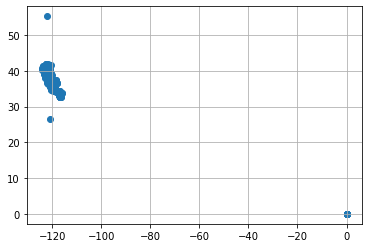

In [22]:
# Source of code: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda
# check coordinates; there are quite a few unrealistic ones
plt.scatter(major_df.Longitude, major_df.Latitude)
plt.grid()
plt.show()

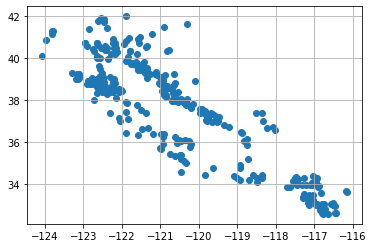

In [23]:
# Source of code: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda
# remove those rows having unrealistic coordinates
major_df_select =major_df[major_df.Longitude<-115]
major_df_select = major_df_select[(major_df_select.Latitude<44) & (major_df_select.Latitude > 30)]
plt.scatter(major_df_select.Longitude, major_df_select.Latitude)
plt.grid()
plt.show()

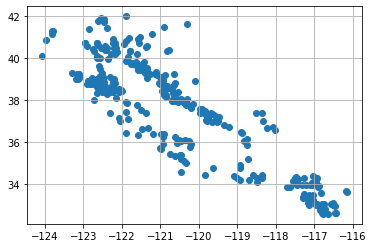

In [24]:
# Source of code: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda
# major_df_select = major_df_select[major_df_select.CanonicalUrl!='/incidents/2013/8/6/tram-fire/']
plt.scatter(major_df_select.Longitude, major_df_select.Latitude)
plt.grid()
plt.show()

In [50]:
# some of the code came from: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda

zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,major_df_select.shape[0]):
   folium.Circle(
      location=[major_df_select.iloc[i]['Latitude'], major_df_select.iloc[i]['Longitude']],
      radius=np.sqrt(major_df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + str(int(major_df_select.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(major_df_select.iloc[i]['AcresBurned']),
      tooltip=str,
       fill=True,
      fill_color='yellow'
   ).add_to(my_map_1)
# my_map_1.save("my_map_1.png")
my_map_1.save('osm.html')
# import io
# from PIL import Image

# img_data = my_map_1._to_png(5)
# img = Image.open(io.BytesIO(img_data))
# img.save('image.png')


my_map_1 # display

#  + major_df_select.iloc[i]['CanonicalUrl'] + - Year:' 
# icon_image=array-likeobject,
# SEE IF I CAN PLOT THE COUNTIES WITH NO FIRES: ALPINE, IMPERIAL, SAN FRANCISCO

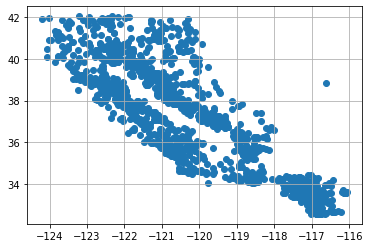

In [26]:
# code came from: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda
major2_df_select =major2_df[major2_df.Longitude<-115]
major2_df_select = major2_df_select[(major2_df_select.Latitude<44) & (major2_df_select.Latitude > 30)]
plt.scatter(major2_df_select.Longitude, major2_df_select.Latitude)
plt.grid()
plt.show()

In [28]:
# Displaying Fires burning more than 10 acres
# some of the code came from: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda
zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_3 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,major2_df_select.shape[0]):
   folium.Circle(
      location=[major2_df_select.iloc[i]['Latitude'], major2_df_select.iloc[i]['Longitude']],
      radius=np.sqrt(major2_df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + str(int(major2_df_select.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(major2_df_select.iloc[i]['AcresBurned']),
      tooltip=str,
       fill=True,
      fill_color='yellow'
   ).add_to(my_map_3)
# my_map_1.save("my_map_1.png", dpi=110)
my_map_3.save('osm3.html')
my_map_3 # display

In [175]:
# source of code came from: https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd

# from branca.element import Template, MacroElement

# template = """
# {% macro html(this, kwargs) %}

# <!doctype html>
# <html lang="en">
# <head>
#   <meta charset="utf-8">
#   <meta name="viewport" content="width=device-width, initial-scale=1">
#   <title>jQuery UI Draggable - Default functionality</title>
#   <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

#   <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
#   <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
#   <script>
#   $( function() {
#     $( "#maplegend" ).draggable({
#                     start: function (event, ui) {
#                         $(this).css({
#                             right: "auto",
#                             top: "auto",
#                             bottom: "auto"
#                         });
#                     }
#                 });
# });

#   </script>
# </head>
# <body>

 
# <div id='maplegend' class='maplegend' 
#     style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
#      border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
# <div class='legend-title'>Legend (draggable!)</div>
# <div class='legend-scale'>
#   <ul class='legend-labels'>
#     <li><span style='background:red;opacity:0.7;'></span>Fire</li>
#     <li><span style='background:purple;opacity:0.7;'></span>County with no Fires</li>
#     <li><span style='background:green;opacity:0.7;'></span>Small</li>

#   </ul>
# </div>
# </div>
 
# </body>
# </html>

# <style type='text/css'>
#   .maplegend .legend-title {
#     text-align: left;
#     margin-bottom: 5px;
#     font-weight: bold;
#     font-size: 90%;
#     }
#   .maplegend .legend-scale ul {
#     margin: 0;
#     margin-bottom: 5px;
#     padding: 0;
#     float: left;
#     list-style: none;
#     }
#   .maplegend .legend-scale ul li {
#     font-size: 80%;
#     list-style: none;
#     margin-left: 0;
#     line-height: 18px;
#     margin-bottom: 2px;
#     }
#   .maplegend ul.legend-labels li span {
#     display: block;
#     float: left;
#     height: 16px;
#     width: 30px;
#     margin-right: 5px;
#     margin-left: 0;
#     border: 1px solid #999;
#     }
#   .maplegend .legend-source {
#     font-size: 80%;
#     color: #777;
#     clear: both;
#     }
#   .maplegend a {
#     color: #777;
#     }
# </style>
# {% endmacro %}"""

# macro = MacroElement()
# macro._template = Template(template)

# my_map_1.get_root().add_child(macro)

# my_map_1

In [176]:
# alpine=Latitude=38.59
# alpine= Longitude= -119.88
# area= 739sq mi

# Imperial =Latitude = 32.85
#         Longitude = -115.57
#     area = 4,175 sq mi
    
# San Francisco = Latitude = 37.77
#         Longitude = -122.42
#     area = 47 sq mi
    
df=pd.DataFrame({"Latitude" : [38.59, 32.85, 37.77],
                "Longitude" : [-119.88, -115.17, -122.42],
                "Area" : [739, 4175, 47]},
               index = ['Alpine', 'Imperial', 'San_Francisco'])

In [177]:
# Counties with no Acreage burned
zoom_factor = 5 # inital map size
# radius_scaling = 50 # scaling of bubbles

my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,df.shape[0]):
   folium.Circle(
      location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
      radius=(df.iloc[i]['Area']*15),
      color='purple',
      popup=str(df.iloc[i]['Area']),
      tooltip=str,
       fill=True,
   ).add_to(my_map_1)
my_map_1.save('osm2.html')
my_map_1 # display
# fill_color='purple'
#np.sqrt*radius_scaling

In [178]:
# # interactive map

# Source of code: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda
    

# use heatmap
my_map_2 = folium.Map(location=[36,-120], zoom_start=zoom_factor)
HeatMap(data=major_df_select[['Latitude', 'Longitude']], radius=10, legend_name="AcresBurned").add_to(my_map_2)

my_map_2 # display
#didn't display legend_name